# The model detects if the image is infected or not by malaria using both transfer learning(using vgg19) and also it follows with our very own CNN network from scratch 

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size the images
IMAGE_SIZE = [224, 224]

In [3]:
# Import the Vgg 19 and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 10s 0us/step


In [14]:
folders = glob('Dataset/Train/*')

In [15]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [17]:
# our layers
x = Flatten()(VGG19.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

In [20]:
# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [21]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [23]:
#compile
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [11]:
training_set

In [12]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [29]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
13/13 [==============================] - 502s 39s/step - loss: 6.6951 - accuracy: 0.4471 - val_loss: 0.7306 - val_accuracy: 0.3209
Epoch 2/8
13/13 [==============================] - 501s 39s/step - loss: 0.6999 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.3209
Epoch 3/8
13/13 [==============================] - 499s 38s/step - loss: 0.7530 - accuracy: 0.4856 - val_loss: 0.6908 - val_accuracy: 0.6791
Epoch 4/8
13/13 [==============================] - 498s 38s/step - loss: 0.7044 - accuracy: 0.4784 - val_loss: 0.6934 - val_accuracy: 0.3209
Epoch 5/8
13/13 [==============================] - 497s 38s/step - loss: 0.6932 - accuracy: 0.4856 - val_loss: 0.6927 - val_accuracy: 0.6791
Epoch 6/8
13/13 [==============================] - 497s 38s/step - loss: 0.6930 - accuracy: 0.5288 - val_loss: 0.6921 - val_accuracy: 0.6791
Epoch 7/8
13/13 [==============================] - 501s 39s/step - loss: 0.692

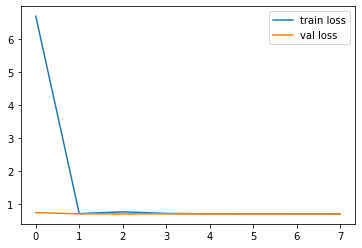

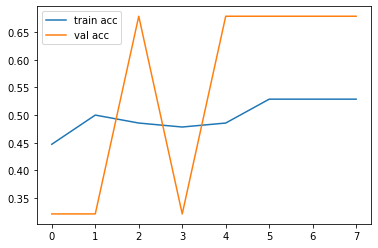

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## The above plot shows that using transfer learning is not a good idea. So lets make our own model!

In [57]:
from tensorflow.keras.layers import MaxPooling2D

In [69]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [70]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [71]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
13/13 [==============================] - 12s 913ms/step - loss: 2.4438 - accuracy: 0.5337 - val_loss: 0.6710 - val_accuracy: 0.6791
Epoch 2/30
13/13 [==============================] - 12s 906ms/step - loss: 0.6830 - accuracy: 0.5938 - val_loss: 0.7008 - val_accuracy: 0.4179
Epoch 3/30
13/13 [==============================] - 12s 946ms/step - loss: 0.6281 - accuracy: 0.6611 - val_loss: 0.7184 - val_accuracy: 0.4403
Epoch 4/30
13/13 [==============================] - 15s 1s/step - loss: 0.5556 - accuracy: 0.7163 - val_loss: 0.8483 - val_accuracy: 0.3582
Epoch 5/30
13/13 [==============================] - 13s 996ms/step - loss: 0.5408 - accuracy: 0.7236 - val_loss: 0.8580 - val_accuracy: 0.4403
Epoch 6/30
13/13 [==============================] - 13s 962ms/step - loss: 0.4646 - accuracy: 0.7428 - val_loss: 1.1425 - val_accuracy: 0.3433
Epoch 7/30
13/13 [==============================] - 13s 987ms/step - loss: 0.4642 - accuracy: 0.7668 - val_loss: 0.6135 - val_accuracy: 0.6642
Ep

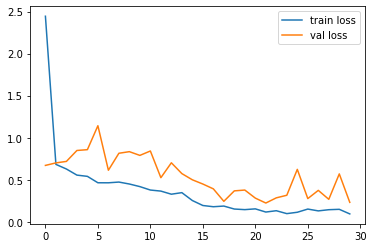

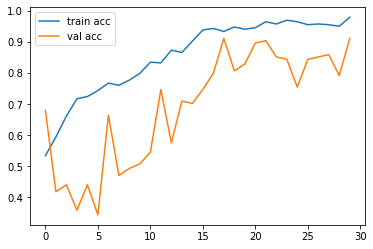

<Figure size 432x288 with 0 Axes>

In [72]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [73]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [197]:
y_pred = model.predict(test_set)

In [198]:
y_pred

array([[9.99952912e-01, 4.70878913e-05],
       [1.03457287e-01, 8.96542728e-01],
       [9.97314513e-01, 2.68548494e-03],
       [9.99098659e-01, 9.01379390e-04],
       [9.51626956e-01, 4.83729839e-02],
       [7.74437010e-01, 2.25562960e-01],
       [6.35656416e-01, 3.64343613e-01],
       [9.16584611e-01, 8.34153369e-02],
       [5.61043359e-02, 9.43895638e-01],
       [9.99986768e-01, 1.31794650e-05],
       [1.99468091e-01, 8.00531864e-01],
       [2.56560296e-01, 7.43439734e-01],
       [6.61285669e-02, 9.33871388e-01],
       [1.08279690e-01, 8.91720295e-01],
       [1.12875268e-01, 8.87124717e-01],
       [9.99053061e-01, 9.46951623e-04],
       [1.00000000e+00, 8.67493360e-13],
       [6.40381351e-02, 9.35961902e-01],
       [9.55738127e-01, 4.42618839e-02],
       [6.32538617e-01, 3.67461383e-01],
       [2.30919898e-01, 7.69080102e-01],
       [5.85951693e-02, 9.41404819e-01],
       [9.97665405e-01, 2.33457820e-03],
       [8.29894990e-02, 9.17010427e-01],
       [5.998688

In [199]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [200]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('model_vgg19.h5')

In [67]:
img=image.load_img('Dataset/Train/Uninfected/C2NThinF_IMG_20150604_114631_cell_141.png',target_size=(224,224))

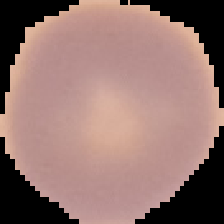

In [68]:
img

In [69]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [70]:
x.shape

(224, 224, 3)

In [71]:
x=x/255

In [72]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [73]:
model.predict(img_data)

array([[0.02918079, 0.97081923]], dtype=float32)

In [74]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1], dtype=int64)

In [75]:
if(a==[1]):
    print("Uninfected")
else:
    print("Infected")

Uninfected
